In [73]:
# importing the nesseccary libarires 
import requests
import json
import re
import time
from pymongo import MongoClient
import pandas as pd
import numpy as np
#API URL
API_URL = "http://api.pushshift.io/reddit"

# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook


# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE

## data base objects  #
client = MongoClient('localhost', 27017)
db = client['Practicum_II']
Reddit_Data = db['Reddit_Data']
# values for pushshift parameter 

In [20]:


def URL_obj(end_point = "comment",**kwargs):
    # Default paramaters for API query
    params = {
        "sort_type":"created_utc",
        "sort":"asc",
        "size":1000
        }
    #print("param is " + str(params))
    # Add additional paramters based on function arguments
    for key,value in kwargs.items():
        params[key] = value

    # Print API query paramaters
    print(params)

    par_url = API_URL + "/" + end_point + "/search/"
    res = requests.get(par_url , params=params,timeout= 60)
    if res.status_code == 200:
        response = json.loads(res.text)
        data = response['data']
        sorted_data_by_id = sorted(data, key=lambda x: int(x['id'],36))
        return sorted_data_by_id
    else :
        print(res.status_code,)

In [21]:
#taken from first development
# one of the challenges here is that we can't take len(objects) because we will have a constant 100 
# document return at once , we need to have a loop to go through each records. 
# While loop for recursive function

def populate_reddit_data(frm_created_date =1546300800,**kwargs): 
    cntr = 0
    #yesterday = int(time.time() - 24*60*60)
    while 1:
        # bring the response objects
        objects = URL_obj(**kwargs,after=frm_created_date)
        success = True
        # Loop the returned data, ordered by date
        if objects is not None :
            for object in objects:
                id = int(object['id'],36) # convert string value of Id field to number
                if id > cntr:
                    success = False
                    created_utc = object['created_utc']
                    cntr = id
                    db.Reddit_Data.insert_one(object)
                    #print(objects)
                    if created_utc > frm_created_date: frm_created_date = created_utc

        # Exit if nothing happened
        if success: return
        frm_created_date -= 1



In [8]:
# for comment 
populate_reddit_data(subreddit="datascience",end_point="comment", frm_created_date =1567713638)

{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1567713638}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1567739705}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1567791007}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1567831560}
520


In [42]:
#for submission
populate_reddit_data(subreddit="datascience",end_point="submission", frm_created_date =1607377567)

{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1607377567}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'subreddit': 'datascience', 'after': 1607377567}


In [22]:
# construct data frame from mongodb for comment and submission 
import pandas as pd
submission = pd.DataFrame(list(db['Reddit_Data'].find({'score':{'$exists':True}})))
submission.head(10)
                             

,_id,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,...,author_premium,poll_data,treatment_tags,upvote_ratio,url_overridden_by_dest,author_flair_template_id,body,is_submitter,link_id,parent_id
0,5fcbaabd118630cee0336cf0,incubateshovels,None,[],None,text,t2_2lt97q0n,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fcbaabd118630cee0336cf1,corpnce,None,[],None,text,t2_2rwb7x2u,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fcbaabd118630cee0336cf2,nullbyte91,None,[],None,text,t2_1lfwcxhn,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fcbaabd118630cee0336cf3,hiren_p,None,[],None,text,t2_1suj55nv,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fcbaabd118630cee0336cf4,min2bro,None,[],None,text,t2_alv03,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fcbaabd118630cee0336cf5,TearinCain,None,[],None,text,t2_l3u3wft,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fcbaabd118630cee0336cf6,_joermungandr_,None,[],None,text,t2_lz4fs,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fcbaabd118630cee0336cf7,multiribzv3,None,[],None,text,t2_2ht8mf6n,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fcbaabd118630cee0336cf8,mdwas,None,[],None,text,t2_qrbzxvt,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fcbaabd118630cee0336cf9,men_nas_io,None,[],None,text,t2_1c5m34r9,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# again here we are only interested in few of the columns such as submission body , submission created_utc date, score, etc
submission_flitered = pd.DataFrame(list(db['Reddit_Data'].find({'score':{'$exists':True}},{'_id' :0,'id':1,'score':1,'created_utc' :1,'title' :1 ,'selftext':1,'num_comments':1})))
submission_flitered.head(10)                
                                                                                           

,created_utc,id,num_comments,score,selftext,title
0,1546306578,abdoow,1.0,1,So I've been going through some online boot ca...,What kind of jobs should I shoot for just to g...
1,1546314077,abelhc,0.0,1,,Data Life Cycle New Year Wish
2,1546315391,abeqyl,0.0,1,,A collection of Bash scripts to install data s...
3,1546321018,abfglv,0.0,1,,6 Major Benefits of Open Data
4,1546330165,abgh1c,0.0,1,,Hey Google! When did I ask you to read my Purc...
5,1546333870,abgtfi,2.0,1,"Hello Everyone! I've had an ""arms-reach"" inter...",Foot in the door
6,1546339597,abhb1p,6.0,1,,An Idiot ’ s guide to Support vector machines ...
7,1546342198,abhjcr,4.0,1,,What are your thoughts on this article reasoni...
8,1546343042,abhlxp,7.0,1,"Hello Everybody,\n\nI will start soon working ...","Graph theory, graph algorithms. Looking for re..."
9,1546347347,abhzw4,3.0,1,Hello guys and happy new year ! Has anyone bou...,Data Science book question


In [24]:
submission_flitered['created_utc']


0        1546306578
1        1546314077
2        1546315391
3        1546321018
4        1546330165
            ...    
56368    1567829822
56369    1567829870
56370    1567830129
56371    1567830267
56372    1567831561
Name: created_utc, Length: 56373, dtype: int64

In [25]:
# change the timestamp to datetime of a dataframe field 
import datetime 
#sub_time = time.strftime("%D %H:%M", time.localtime(int(submission_flitered['created_utc'])))
#df['date'] = pd.to_datetime(df['date'],unit='s')
submission_flitered['created_utc'] = pd.to_datetime(submission_flitered['created_utc'] ,unit='s')
submission_flitered['created_utc']

0       2019-01-01 01:36:18
1       2019-01-01 03:41:17
2       2019-01-01 04:03:11
3       2019-01-01 05:36:58
4       2019-01-01 08:09:25
                ...        
56368   2019-09-07 04:17:02
56369   2019-09-07 04:17:50
56370   2019-09-07 04:22:09
56371   2019-09-07 04:24:27
56372   2019-09-07 04:46:01
Name: created_utc, Length: 56373, dtype: datetime64[ns]

## Data analysis 
###  date time and score fields can tell us about how many of submission per day  and max min score count.


In [26]:
# To find how many counts of submission per day

sub_perday = (pd.to_datetime(submission_flitered['created_utc'])
              .dt.floor('d')
              .value_counts()
              .rename_axis('date')
              .reset_index(name='count'))
print (sub_perday)

          date  count
0   2019-05-15    453
1   2019-08-08    415
2   2019-06-24    409
3   2019-07-09    403
4   2019-09-03    403
..         ...    ...
702 2019-10-20     16
703 2019-11-30     16
704 2019-04-20     16
705 2019-12-22     16
706 2020-11-05      6

[707 rows x 2 columns]


<AxesSubplot:xlabel='date', ylabel='count'>

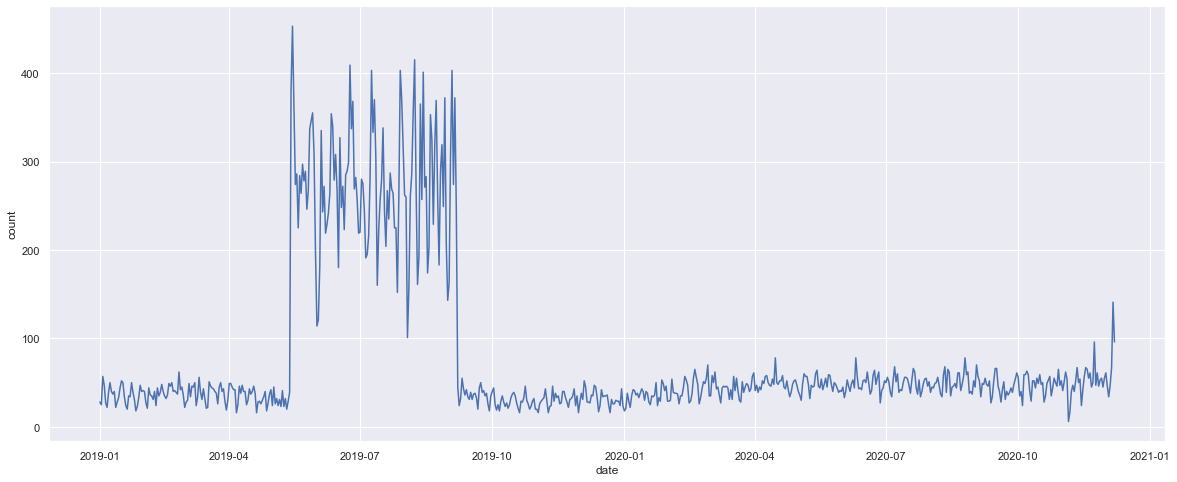

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(data=sub_perday, x="date", y="count")

##### There seems to be high reddit posts between mid May 2019 and September 2019 with average of 300 submission a day
##### And among these, lets find out which has more scores for the post submitted.

In [28]:
# fliter the dataframe between May2019 and Sep 2019
sub_perday = sub_perday.loc['2019-05-01':'2019-09-01']

df= submission_flitered
df=df[(df['created_utc'] > '2019-5-15') & (df['created_utc'] < '2019-09-01')]
df

,created_utc,id,num_comments,score,selftext,title
4847,2019-05-15 00:11:50,boqola,16.0,2,Whether you are working in the field or studyi...,How do you explain to people what you do/study?
4848,2019-05-15 00:57:24,bor600,2.0,3,,Computer Age Statistical Inference - Algorithm...
4849,2019-05-15 01:01:42,bor7qj,64.0,1038,,When you use a neural net over logistic regres...
4850,2019-05-15 01:54:44,bors5n,13.0,4,I'm graduating with an MS in Data Science this...,Gifts for Data Scientists?
4851,2019-05-15 02:40:04,bos97j,1.0,1,[removed],How to get the average amount of a variable fo...
...,...,...,...,...,...,...
54772,2019-08-31 22:50:26,eyp6zbs,NaN,2,NaN,NaN
54773,2019-08-31 22:57:26,eyp7iaz,NaN,1,NaN,NaN
54774,2019-08-31 22:58:09,eyp7kat,NaN,1,NaN,NaN
54775,2019-08-31 23:31:54,eypa56n,NaN,1,NaN,NaN


<AxesSubplot:xlabel='created_utc', ylabel='score'>

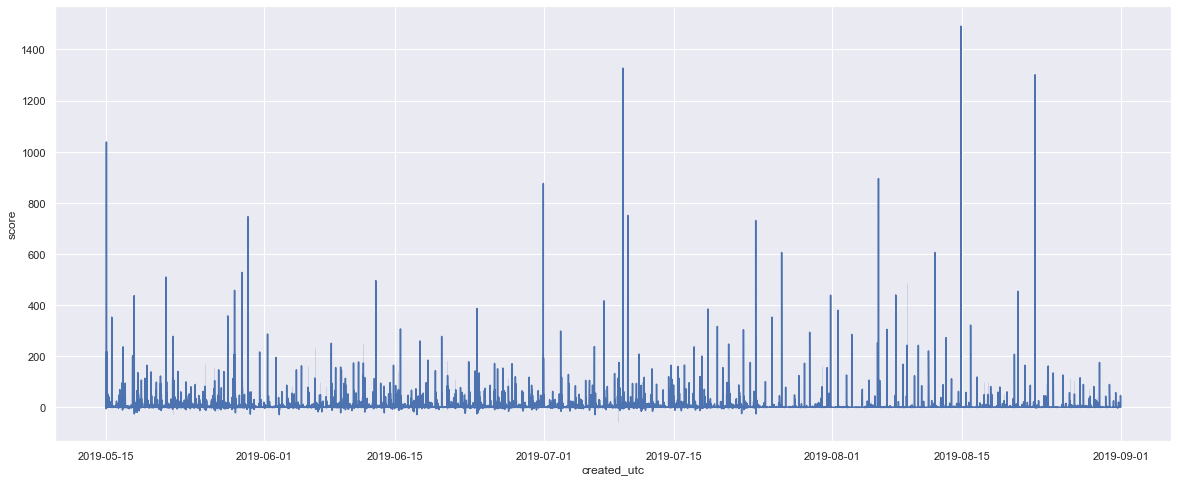

In [29]:
date = df['created_utc']
score = df['score']
sns.lineplot(data=sub_perday, x=date, y=score)

##### Another analysis is to visualize number of comments for each posts

<AxesSubplot:xlabel='created_utc', ylabel='num_comments'>

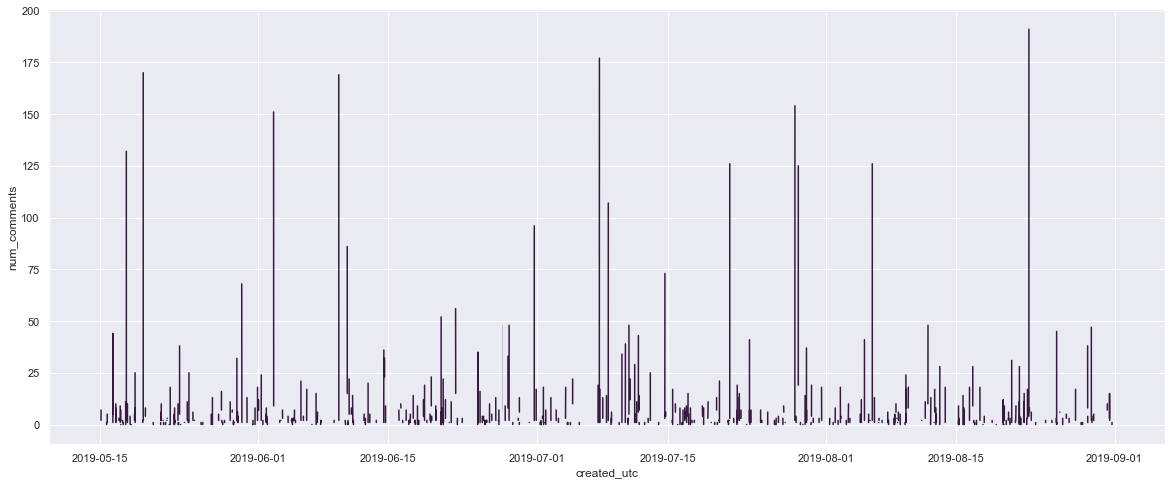

In [30]:
# setting the grid property
sns.set(style="darkgrid")
sns.set_palette("rocket")

num_comments = df['num_comments']
sns.lineplot(data=sub_perday, x=date, y=num_comments)

## Sentiment analysis

In [31]:
# importing the required librarires

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()


In [32]:
# title of submission data for training data set
# to project data that is two fields got concatenated (text and self text)
pipline = [ { '$project': { 'text':{'$concat':['$title', " ", '$selftext']}}}]
sub_concat = pd.DataFrame(list(db['Reddit_Data'].aggregate(pipline)))
sub_concat.head()

,_id,text
0,5fcbaabd118630cee0336cf0,What kind of jobs should I shoot for just to g...
1,5fcbaabd118630cee0336cf1,Data Life Cycle New Year Wish
2,5fcbaabd118630cee0336cf2,A collection of Bash scripts to install data s...
3,5fcbaabd118630cee0336cf3,6 Major Benefits of Open Data
4,5fcbaabd118630cee0336cf4,Hey Google! When did I ask you to read my Purc...


In [33]:
# recalling the submission title text
text_sub = sub_concat['text']
text_sub.head()

0    What kind of jobs should I shoot for just to g...
1                       Data Life Cycle New Year Wish 
2    A collection of Bash scripts to install data s...
3                       6 Major Benefits of Open Data 
4    Hey Google! When did I ask you to read my Purc...
Name: text, dtype: object

In [34]:
#comment body
comment_flitered = pd.DataFrame(list(db['Reddit_Data'].find({'body':{'$exists':True}},{'_id' :0,'body':1})))
comm_text = comment_flitered['body']
comm_text.head()


0    I would love that, feel free to post it here o...
1    Your submission to r/datascience has been remo...
2                                        Tidy data ftw
3    Your submission has been automatically removed...
4    Your submission looks like a question. Does yo...
Name: body, dtype: object

In [35]:
#concatenating 
text = pd.concat([text_sub , comm_text])
text = text.dropna(how='any',axis=0)
text.head(4)

0    What kind of jobs should I shoot for just to g...
1                       Data Life Cycle New Year Wish 
2    A collection of Bash scripts to install data s...
3                       6 Major Benefits of Open Data 
dtype: object

In [36]:
# used VADER to obtain sentiment value 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #VADER sentiment model
analyser = SentimentIntensityAnalyzer()
temp=[]
for val in text:
    sentiment=0
    try:
        sentiment=sentiment+analyser.polarity_scores(val)['compound']
        temp.append(
            {
             'sentiment' :sentiment ,
              'sentiment text' : val 
            }
        )
    except :
        sentiment=0


df_1 = pd.DataFrame(temp)
df_1.head()

,sentiment,sentiment text
0,0.7391,What kind of jobs should I shoot for just to g...
1,0.4019,Data Life Cycle New Year Wish
2,0.0000,A collection of Bash scripts to install data s...
3,0.4391,6 Major Benefits of Open Data
4,0.0000,Hey Google! When did I ask you to read my Purc...


In [38]:
df_mean = df_1['sentiment'].mean()  # 0.38589509953786
df_1['rnd_sentiment'] = 0
df_1.loc[df_1['sentiment'] > df_mean, 'rnd_sentiment'] = 1
df_1.loc[df_1['sentiment'] < (-1* df_mean), 'rnd_sentiment'] = -1
df_1.head(20)

,sentiment,sentiment text,rnd_sentiment
0,0.7391,What kind of jobs should I shoot for just to g...,1
1,0.4019,Data Life Cycle New Year Wish,1
2,0.0000,A collection of Bash scripts to install data s...,0
3,0.4391,6 Major Benefits of Open Data,1
4,0.0000,Hey Google! When did I ask you to read my Purc...,0
5,0.9841,"Foot in the door Hello Everyone! I've had an ""...",1
6,-0.1531,An Idiot ’ s guide to Support vector machines ...,0
7,0.0000,What are your thoughts on this article reasoni...,0
8,0.8879,"Graph theory, graph algorithms. Looking for re...",1
9,0.7393,Data Science book question Hello guys and happ...,1


### using word2vec model

In [60]:
import pandas as pd
import nltk
df_2 = df_1.drop(['sentiment','rnd_sentiment'], axis=1)
df_3 = df_2.apply(lambda x: x.astype(str).str.lower().str.replace('!,.', '') )
df_3['tokenized'] = df_3.apply(lambda row: nltk.word_tokenize(row['sentiment text']), axis=1)
#df_3= df_3.str.replace('\W', '')
#df_2['sentiment text'] =  text
df_3.head()

,sentiment text,tokenized
0,what kind of jobs should i shoot for just to g...,"[what, kind, of, jobs, should, i, shoot, for, ..."
1,data life cycle new year wish,"[data, life, cycle, new, year, wish]"
2,a collection of bash scripts to install data s...,"[a, collection, of, bash, scripts, to, install..."
3,6 major benefits of open data,"[6, major, benefits, of, open, data]"
4,hey google! when did i ask you to read my purc...,"[hey, google, !, when, did, i, ask, you, to, r..."


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(df_3['tokenized']),np.array(df_2['sentiment text']), test_size=0.2)


In [62]:
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Doc2vec paragraph embeddings -  https://radimrehurek.com/gensim/models/doc2vec.html 

# create a lable 
def give_label (txt,lbl_type):
    labelized = []
    for i,v in tqdm(enumerate(txt)):
        label = '%s_%s'%(lbl_type,i)
        labelized.append(TaggedDocument(v, [label]))
    return labelized

x_train = give_label(x_train, 'TRAIN')
x_test = give_label(x_test, 'TEST')

45008it [00:00, 520780.59it/s]
11252it [00:00, 621656.66it/s]


In [63]:
x_train[0]


TaggedDocument(words=['data', 'science', 'can', 'be', 'defined', 'as', '``', 'everything', 'relating', 'to', 'data', "''", 'and', 'is', 'mostly', 'an', 'industry', 'specific', 'term', '.', 'it', 'will', 'use', 'all', 'techniques', 'available', '.', 'from', 'basic', 'statistics', 'to', 'voodoo', 'magic', '.', 'same', 'techniques', 'can', 'be', 'used', 'in', 'different', 'fields', 'for', 'different', 'purposes', '.'], tags=['TRAIN_0'])

In [67]:
# train the model feeding the x_train chunk of text 
from gensim.models import Word2Vec

model = Word2Vec(size= 200, min_count=10)
model.build_vocab([x.words for x in tqdm(x_train)])
model.train([x.words for x in tqdm(x_train)],total_examples=model.corpus_count, epochs=model.iter)

100%|██████████| 45008/45008 [00:00<00:00, 2534092.68it/s]
<ipython-input-67-0f674c981f80>:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train([x.words for x in tqdm(x_train)],total_examples=model.corpus_count, epochs=model.iter)


(13146225, 18838320)

### Visualizing the Word Vectors 

In [105]:
# create a iteratable list from model
model_list = list(model.wv.vocab)
# defining the chart
output_notebook()
plt_model = bp.figure(plot_width=1000, 
                       plot_height=900, 
                       title="A map of 20000 word vectors",
                       tools="pan,wheel_zoom,box_zoom,reset,hover,save",
                       x_axis_type=None, 
                       y_axis_type=None, 
                       min_border=1)

# itterate through a list of 20000 elem.
word_vectors = [model[w] for w in model_list[:10000]]  

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = model_list[:10000]  

# create interactive plot 
plt_model.scatter(x='x', y='y', source=tsne_df)
hover = plt_model.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plt_model)

Loading BokehJS ...

<ipython-input-105-034beb1952bd>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = [model[w] for w in model_list[:10000]]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9282 samples in 0.069s...
[t-SNE] Computed neighbors for 9282 samples in 32.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9282
[t-SNE] Computed conditional probabilities for sample 2000 / 9282
[t-SNE] Computed conditional probabilities for sample 3000 / 9282
[t-SNE] Computed conditional probabilities for sample 4000 / 9282
[t-SNE] Computed conditional probabilities for sample 5000 / 9282
[t-SNE] Computed conditional probabilities for sample 6000 / 9282
[t-SNE] Computed conditional probabilities for sample 7000 / 9282
[t-SNE] Computed conditional probabilities for sample 8000 / 9282
[t-SNE] Computed conditional probabilities for sample 9000 / 9282
[t-SNE] Computed conditional probabilities for sample 9282 / 9282
[t-SNE] Mean sigma: 0.292508
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.933151
[t-SNE] KL divergence after 1000 iterations: 3.034626


In [68]:
# test the model for random word
model['google']

<ipython-input-68-14dcfdb0e6b4>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['google']


array([ 0.9665607 , -0.05132921,  0.14168961,  0.51046646, -0.43668494,
       -0.95785654,  0.32622722, -1.2308632 ,  0.30911607, -0.22609717,
        0.617613  , -1.2652628 ,  2.0101817 , -1.1184776 ,  0.26742992,
        0.1426991 , -1.108402  ,  0.7028718 ,  0.7264187 ,  0.04761796,
       -0.27866498, -0.18857075,  0.37073326,  0.17455673, -0.5420136 ,
       -0.4486415 ,  0.4447419 ,  1.1842042 ,  0.677791  , -0.68308574,
       -0.6209758 ,  0.8192716 ,  0.09536318,  0.70382696,  0.01192406,
        0.63107574,  0.2650888 ,  0.9588841 ,  0.17350191,  0.39120236,
        1.9668633 ,  0.53293043,  0.41505337, -0.88765365, -1.4451681 ,
        0.369541  ,  0.54311854,  0.26888943,  0.2866285 ,  0.62044656,
        1.1960953 ,  0.03671174,  0.74993604, -1.5667366 , -1.1964501 ,
        0.5406756 , -0.62428397, -0.29086435,  0.32344267, -0.91538715,
       -0.34704348,  0.18299863, -0.17621036, -0.8391149 ,  0.12671734,
        0.78592324,  0.3814969 ,  0.5307871 ,  0.11795094, -0.48

In [69]:
# and check similar word with the model 
model.most_similar('google')

<ipython-input-69-f5c59c0eb57c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('google')


[('amazon', 0.7467950582504272),
 ('facebook', 0.7213490009307861),
 ('microsoft', 0.6766010522842407),
 ('colab', 0.6644848585128784),
 ('sheets', 0.6615294218063354),
 ('gcp', 0.6199895143508911),
 ('aws', 0.6194904446601868),
 ('twitter', 0.6159026622772217),
 ('cheat', 0.6114936470985413),
 ('watson', 0.6003912091255188)]